# Query the AGDC and get DEM data

get the dem data for AOI, calculate its mean heigh haverage, maskout the high ground pixels, plot the lower ground dem-data

* Discover for relevant data
* Get the data
* Analyse the data
* Present visulaization of the data

# Setting up environment python modules

In [1]:
#def if necesary os.environ['GDAL_DATA']='/g/data/u46/fxz547/anaconda2/share/gdal/'
# print os.getcwd()

# print os.environ['GDAL_DATA']
!echo $GDAL_DATA
!echo "PYTHONPATH: $PYTHONPATH "
!which python

import os, sys
paths=sys.path
#paths.append('/g/data1/u46/fxz547/Githubz/agdc-v2')
paths.insert(0,'/g/data1/u46/fxz547/Githubz/agdc-v2')  #prepend a path 
for p in  sys.path:
    print p
    
# do this again after insert python path below
import imp; imp.find_module('datacube/api')  # check which python module file is being used

/g/data/u46/fxz547/anaconda2/share/gdal/
PYTHONPATH: /projects/v10/NEMO/hpc-lpgs/python: 
/g/data/u46/fxz547/anaconda2/bin/python
/g/data1/u46/fxz547/Githubz/agdc-v2

/g/data/u46/fxz547/anaconda2/lib/python2.7/site-packages/setuptools-20.2.2-py2.7.egg
/projects/v10/NEMO/hpc-lpgs/python
/g/data1/u46/fxz547/Githubz/wofs/Zlocaltest
/g/data/u46/fxz547/anaconda2/lib/python27.zip
/g/data/u46/fxz547/anaconda2/lib/python2.7
/g/data/u46/fxz547/anaconda2/lib/python2.7/plat-linux2
/g/data/u46/fxz547/anaconda2/lib/python2.7/lib-tk
/g/data/u46/fxz547/anaconda2/lib/python2.7/lib-old
/g/data/u46/fxz547/anaconda2/lib/python2.7/lib-dynload
/home/547/fxz547/.local/lib/python2.7/site-packages
/g/data1/u46/fxz547/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg
/g/data/u46/fxz547/anaconda2/lib/python2.7/site-packages
/g/data/u46/fxz547/anaconda2/lib/python2.7/site-packages/cryptography-1.0.2-py2.7-linux-x86_64.egg
/g/data/u46/fxz547/anaconda2/lib/python2.7/site-packages/IPython/extensions
/hom

(None, '/g/data1/u46/fxz547/Githubz/agdc-v2/datacube/api', ('', '', 5))

In [3]:
from IPython.display import display

from collections import defaultdict
import xarray as xr
import xarray.ufuncs

from datacube.api import API
from datacube.index import index_connect
from datacube.config import LocalConfig
from datacube.api._conversion import to_datetime
#new updated version: from datacube.api import make_mask, describe_flags

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

from pprint import pprint
from __future__ import print_function

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

import os, sys

In [6]:
DEM_folder = '/g/data/rs0/tiles/EPSG3577/SRTM_DEM/'
LBG_latlon = (-35.3,149.1)
dem_fname = os.path.join(DEM_folder, 'SRTM_DEM_15_-40_20000221115400000000.nc')

print(dem_fname)

/g/data/rs0/tiles/EPSG3577/SRTM_DEM/SRTM_DEM_15_-40_20000221115400000000.nc


# Agdc-v2 API

In [7]:
force_prod = True
if force_prod:
    prod_config = LocalConfig.find(['/g/data/v10/public/modules/agdc-py2-prod/1.0.2/datacube.conf'])
    prod_index = index_connect(prod_config, application_name='api-WOfS-dev')
    dc = API(prod_index)
else:
    dc = API(application_name='api-WOfS-dev')

print( dc.list_field_values('product') )
print( dc.list_field_values('platform') )
print( dc.list_field_values('collection') )
print( dc.list_field_values('instrument') )
#[u'pqa', u'ortho', u'DEM', u'satellite_telemetry_data', u'nbart', u'nbar']
#[u'LANDSAT_8', u'LANDSAT_5', u'SRTM', u'LANDSAT_7']
#[u'eo']
#[u'OLI_TIRS', u'TM', u'SIR', u'ETM']

In [8]:
print( dc.list_field_values('product') )

[u'pqa', u'ortho', u'DEM', u'satellite_telemetry_data', u'nbart', u'nbar']


In [10]:
query = {
    'product': 'DEM',
    #'platform': 'LANDSAT_5',
    'dimensions': {
        'x' : { 'range': (149.06, 149.18) },
        'y' : { 'range': (-35.27, -35.33) },
    'time': { 'range': ((1996, 1, 1), (2016, 7 ,1)) }
    }
}
dem_data = dc.get_data( query )

In [12]:
date_ind = 0
dem_data_val = dem_data['arrays']['elevation'].isel(time=date_ind).values


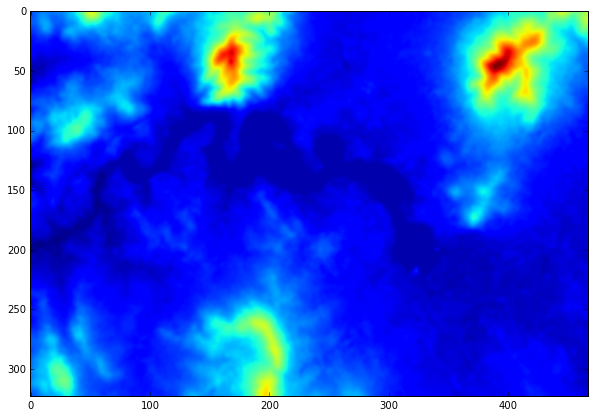

In [13]:
plt.imshow(dem_data_val)

In [17]:
haverage= dem_data_val.mean()

print(haverage)

593.325


# Masking the DEM data

 to mask out the pixels in the dem data according to the height relative the haverage

In [41]:
crop_xind1 = np.where(subs_xvec==L5xvec[0])[0][0]
crop_xind2 = np.where(subs_xvec==L5xvec[-1])[0][0]
crop_yind1 = np.where(subs_yvec==L5yvec[0])[0][0]
crop_yind2 = np.where(subs_yvec==L5yvec[-1])[0][0]
print( crop_xind1, crop_xind2, crop_yind1, crop_yind2 )
print( subs_xvec[crop_xind1], subs_xvec[crop_xind2], subs_yvec[crop_yind1], subs_yvec[crop_yind2] )

200 667 200 522
1543537.5 1555212.5 -3955437.5 -3963487.5


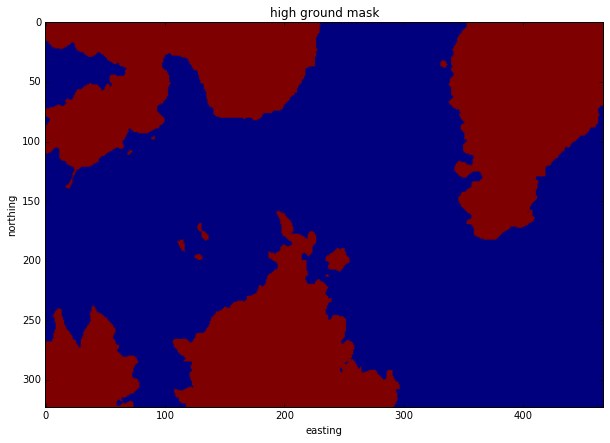

In [18]:
#Looks aligned. Let's create the WOFS mask and mask the LS data..
high_mask = (dem_data_val>=haverage)
plt.imshow(high_mask)
plt.title("high ground mask"); plt.xlabel('easting'); plt.ylabel('northing');

In [20]:
print (type(high_mask), high_mask.shape)

print (high_mask)

<type 'numpy.ndarray'> (323, 468)
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]]


In [21]:
 dem_data_val[high_mask]=np.nan

In [23]:
print (dem_data_val[1,1])

nan


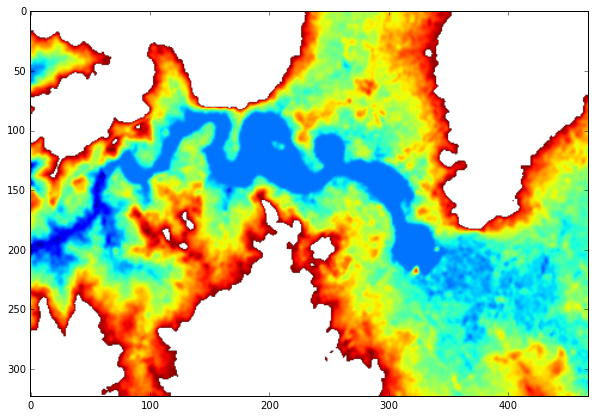

In [24]:
# a low ground image clearly include the Berley Griffin Lake
plt.imshow(dem_data_val)